### IDs:
Insert yours IDs to the cell below

ID #1: 201639663

ID #2: 038198149


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import ssl
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats2
from scipy.stats import multivariate_normal
import time

np.random.seed(0)

n points 0.5089100030952122
n - 1 points -0.9999999999999999


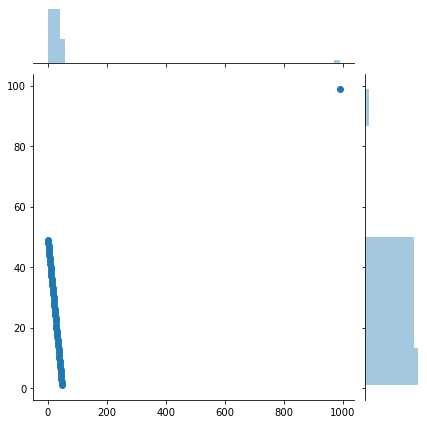

In [45]:

X = np.arange(50)
Y = np.flip(np.arange(50))
X[49] = 990
Y[49] = 99
print('n points',np.corrcoef(X, Y)[0][1])
print('n - 1 points',  np.corrcoef(X[:49], Y[:49])[0][1])


# df = pd.DataFrame({'X':X, 'Y':Y})
# df.plot('X', 'Y', kind='scatter')

sns.jointplot(X, Y)



#### 1.B
Pearson(x,y) = Pearson correlation

τ(x,y) = Kendall rank correlation

ρ(x,y) = Spearman rank correlation

Data with τ(x,y) > ρ(x,y) + 0.45



In [46]:
# Y = np.flip(np.arange(50))
# # Y = np.concatenate(np.flip(np.arange(25)), np.arange(25, 50))
# X_1 = np.flip(np.arange(30))
# X_2 = np.arange(30, 50)
# np.random.shuffle(X_2)
# # print(X_2 )
# # print(Y_2)
# X = np.concatenate((X_1, X_2), axis=0)
# print(X[20:])
# print('τ(x,y) > ρ(x,y) + 0.45')
# print('spearman + 0.45 ====== ', stats.spearmanr(X, Y)[0] + 0.45)
# print('kendle ====== ', stats.kendalltau(X, Y)[0])
# sns.jointplot(X, Y)
import itertools
all_options = list(itertools.permutations([0,1,2,3,4]))
orig = [0,1,2,3,4]
gaps = []
for l in all_options:
    s = stats.spearmanr(orig, l)[0]
    k = stats.kendalltau(orig, l)[0]
    gaps.append({'gap': k - s, 'l': l} )
    
X = np.arange(50)
Y = np.concatenate([np.arange(30,50), np.arange(30)])
s = stats.spearmanr(X, Y)[0]
k = stats.kendalltau(X,Y)[0]
k -s 

print('kendall: ', k)
print('spearman + 0.45: ', s + 0.45)



kendall:  0.020408163265306124
spearman + 0.45:  0.009423769507803215


#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

This sittuation is impossible.
I think that it is impossible since everytime spearman correlation is growing, the number of none concardant pairs is growing with it.
1.b was more possible because while kendall is only counting concardant spearman is also taking the into account the distance of ranking so it was more acheivable to get a bigger gap. 
In order to assert that its impossible I draw all possible permutations over lists of size of 10. 
The highest possilbe value for ρ(x,y) - τ(x,y)
was 0.39

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

-0.7068404106012852 ====== Data with Pearson(x,y)
0.2823529411764706  ======== spearman- 0.6


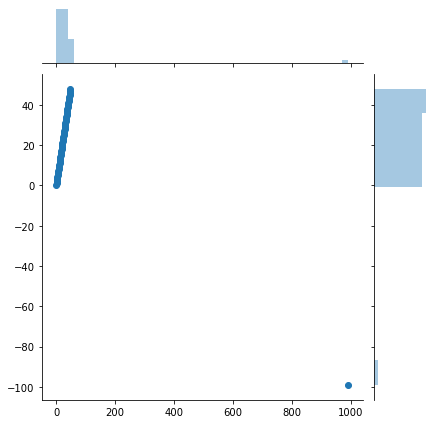

In [47]:
X = np.arange(50)
Y = np.arange(50)
# np.random.shuffle(Y)
X[49] = 990
Y[49] = -99


print(np.corrcoef(X, Y)[0][1], '====== Data with Pearson(x,y)')
print(stats.spearmanr(X, Y)[0] - 0.6,' ======== spearman- 0.6')
# plt.show()
sns.jointplot(X, Y)


#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

0.5089100030952122 ====== Data with Pearson(x,y)
0.3176470588235294  ======== spearman + 1.2


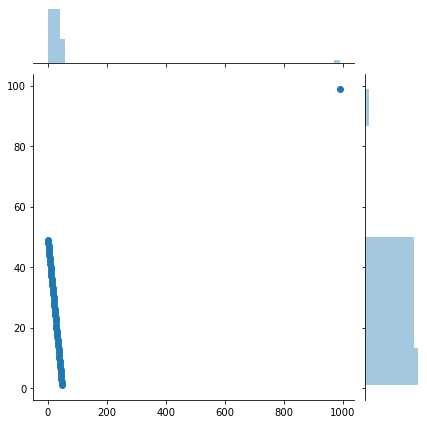

In [48]:
X = np.arange(50)
Y = np.flip(np.arange(50))
# np.random.shuffle(Y)
X[49] = 990
Y[49] = 99


print(np.corrcoef(X, Y)[0][1], '====== Data with Pearson(x,y)')
print(stats.spearmanr(X, Y)[0] + 1.2,' ======== spearman + 1.2')
# plt.show()
sns.jointplot(X, Y)



#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


In [49]:
data = pd.read_csv("heart.csv",sep='\t') 
# Preview the first 5 lines of the loaded data 


In [50]:
print(data.isnull().sum()) 
data.head(30)

age         8
sex         4
cp          5
trestbps    6
chol        6
fbs         3
restecg     2
thalach     4
exang       0
oldpeak     5
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1
5,NaN,1.0,0.0,140.0,192.0,0.0,1.0,NaN,0,0.4,1,0,1,1
6,56.0,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0,1.3,1,0,2,1
7,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0,0.0,2,0,3,1
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0,NaN,2,0,3,1
9,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0,1.6,2,0,2,1


In [51]:
print('imputing missing data')
data = pd.read_csv("heart.csv",sep='\t') 
numerical_columns = ['age', 'trestbps', 'chol', 'thalach','oldpeak']
categorical_columns = ['sex', 'cp', 'restecg','exang', 'slope','ca','thal','fbs']
for col in numerical_columns: 
    data[col].fillna(data[col].median(), inplace = True)
    
for col in categorical_columns: 
    data[col].fillna(data[col].mode()[0], inplace = True)


imputing missing data


In [52]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.405941,0.686469,0.953795,131.630363,245.848185,0.148515,0.524752,149.610561,0.326733,1.036634,1.399340,0.729373,2.313531,0.544554
std,8.964069,0.464696,1.031544,17.358758,51.604360,0.356198,0.519693,22.858624,0.469794,1.158160,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Question 2.A

Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean.

In [53]:
n = data.describe()['age']['count']


In [54]:
data[data['target'] == 1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.515152,0.563636,1.351515,129.315152,241.896970,0.139394,0.593939,158.424242,0.139394,0.589091,1.593939,0.363636,2.121212,1.0
std,9.377325,0.497444,0.961491,15.810928,53.220391,0.347412,0.504818,19.159520,0.347412,0.780089,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,45.000000,0.000000,1.000000,120.000000,209.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,235.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,265.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [55]:
data['age'].std()

8.964069060918124

In [56]:
def is_within_ci(data, col):
    a = 0.05
    c = 0.0
    c1 = 0.0
    x1 = data[data['target'] == 1][col]
    x2 = data[data['target'] == 0][col]
    n1 = len(x1)
    n2 = len(x2)
    m1, s1 = x1.mean(), x1.std()
    m2, s2 = x2.mean(), x2.std()
    SE = np.sqrt(s1**2 / n1 + s2**2 / n2)
    conf_int = (m2-m1 - SE*norm.ppf(1-a/2) , m2-m1 + SE*norm.ppf(1-a/2))
    comp = sms.CompareMeans(sms.DescrStatsW(x2),sms.DescrStatsW(x1))
    conf_int1 = comp.tconfint_diff()
    
    return conf_int

is_within_ci(data,'age')

(2.20610174258312, 6.096928560447177)

In [57]:
for col in numerical_columns:
        print('==========')
        print('col', col )
        print('healthy', data[data['target'] == 0][col].mean())
        print('sick', data[data['target'] == 1][col].mean())
        print(is_within_ci(data, col))

col age
healthy 56.666666666666664
sick 52.515151515151516
(2.20610174258312, 6.096928560447177)
col trestbps
healthy 134.3985507246377
sick 129.3151515151515
(1.1355575846807615, 9.031240834291587)
col chol
healthy 250.57246376811594
sick 241.8969696969697
(-2.892532620825957, 20.243520763118422)
col thalach
healthy 139.07246376811594
sick 158.42424242424244
(-24.11190418153853, -14.591653130714466)
col oldpeak
healthy 1.5717391304347832
sick 0.589090909090909
(0.7347501801873136, 1.2305462625004346)


#### Question 2.B

Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.

C:\Users\danielm\AppData\Local\Continuum\anaconda3_7\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


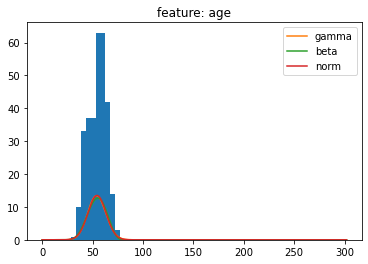

C:\Users\danielm\AppData\Local\Continuum\anaconda3_7\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  
C:\Users\danielm\AppData\Local\Continuum\anaconda3_7\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


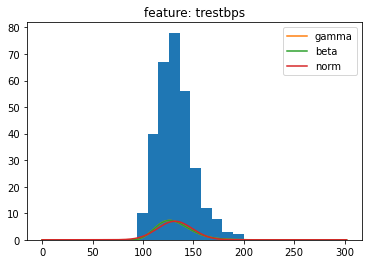

C:\Users\danielm\AppData\Local\Continuum\anaconda3_7\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  
C:\Users\danielm\AppData\Local\Continuum\anaconda3_7\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\danielm\AppData\Local\Continuum\anaconda3_7\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


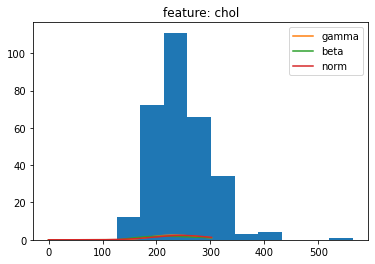

C:\Users\danielm\AppData\Local\Continuum\anaconda3_7\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


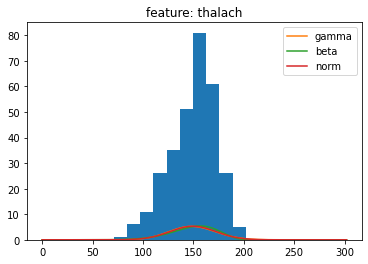

C:\Users\danielm\AppData\Local\Continuum\anaconda3_7\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  
C:\Users\danielm\AppData\Local\Continuum\anaconda3_7\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


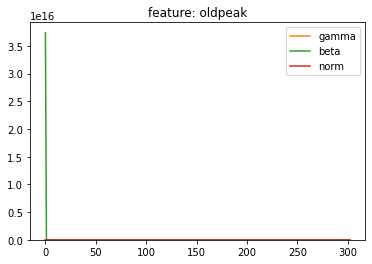

In [58]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats

dist_names = ['gamma', 'beta', 'norm']
for col in numerical_columns:
    size = 303
    x = scipy.arange(size)
    y = data[col]
    h = plt.hist(y)
    plt.title('feature: %s' % col)
    for dist_name in dist_names:
        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(y)
        pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
        plt.plot(pdf_fitted, label=dist_name)
    plt.legend(loc='upper right')
    plt.show()  


#### Q2.C
For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).

In [59]:
import itertools

pearson = []
spearman = []
kendle = []

for pair in itertools.combinations(numerical_columns, 2):
    kendle.append([pair,stats.kendalltau(data[pair[0]], data[pair[1]])[0]])
    spearman.append([pair, stats.spearmanr(data[pair[0]], data[pair[1]])[0]])
    pearson.append([pair,np.corrcoef(data[pair[0]], data[pair[1]])[0][1]])

pearson.sort(key = lambda x: abs(x[1]))
spearman.sort(key = lambda x: abs(x[1]))
kendle.sort(key = lambda x: abs(x[1]))

print(pearson)
print(spearman)
print(kendle)



[[('chol', 'thalach'), -0.017785490817039954], [('trestbps', 'thalach'), -0.04037807115112705], [('chol', 'oldpeak'), 0.060660570504369855], [('trestbps', 'chol'), 0.11528201415539978], [('trestbps', 'oldpeak'), 0.19422012521807216], [('age', 'chol'), 0.20890859159075742], [('age', 'oldpeak'), 0.21847710612643484], [('age', 'trestbps'), 0.256794232630441], [('thalach', 'oldpeak'), -0.33006039658407565], [('age', 'thalach'), -0.40167124456098513]]
[[('trestbps', 'thalach'), -0.030046127777654794], [('chol', 'oldpeak'), 0.056352801075827595], [('chol', 'thalach'), -0.056728482136683134], [('trestbps', 'chol'), 0.1212643989971812], [('trestbps', 'oldpeak'), 0.14971649548776053], [('age', 'chol'), 0.18858595370234046], [('age', 'trestbps'), 0.2605957148412386], [('age', 'oldpeak'), 0.28264044554197887], [('age', 'thalach'), -0.40397100260048757], [('thalach', 'oldpeak'), -0.4189181346651152]]
[[('trestbps', 'thalach'), -0.021216176750762303], [('chol', 'thalach'), -0.03817998784893938], [(

Seem like age has the strongest coorelation with any other feature. Which is not exteremely suprising, but its also nice that the numbers are supporting it.
seems like all 3 correlations are supporting very similar correlation results.

Lets observe at the pair('age', 'thalach') which means correaltion of age and the maximum heart eate achived.
Even none medically trained people knows that the older you get the maximum heart rate you can reach reduces. This knowledge is supported by the negative correlation observed in the numbers above. 


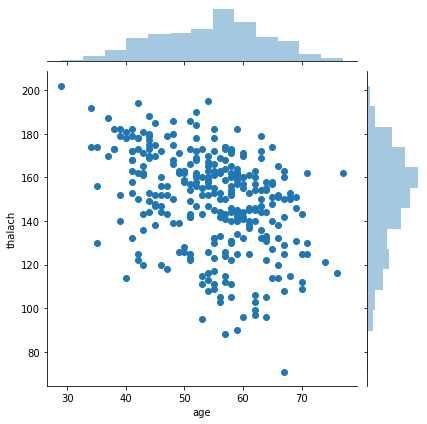

In [60]:
sns.jointplot(data['age'],data['thalach'])

('age', 'thalach')

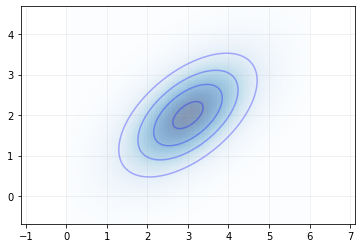

In [61]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

C:\Users\danielm\AppData\Local\Continuum\anaconda3_7\lib\site-packages\ipykernel_launcher.py:17: UserWarning: No contour levels were found within the data range.


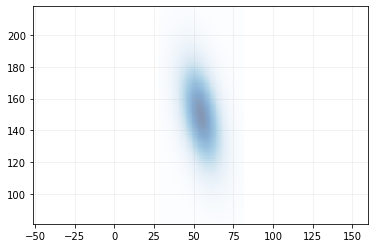

In [62]:

chosen_features = np.array(list(zip(data['age'],data['thalach'])))
mean = np.mean(chosen_features, axis=0)
cov = np.cov(chosen_features, rowvar=0)
plot_2d_Gaussian_pdf(mean, cov)


#### Q2.D

Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?

In [63]:
pearson_male = []
spearman_male = []
kendle_male = []

pearson_female = []
spearman_female = []
kendle_female = []

male_data = data[data['sex'] == 1]
female_data = data[data['sex'] == 0]

for pair in itertools.combinations(numerical_columns, 2):
    kendle_male.append([pair,stats.kendalltau(male_data[pair[0]], male_data[pair[1]])[0]])
    spearman_male.append([pair, stats.spearmanr(male_data[pair[0]], male_data[pair[1]])[0]])
    pearson_male.append([pair,np.corrcoef(male_data[pair[0]], male_data[pair[1]])[0][1]])

pearson_male.sort(key = lambda x: abs(x[1]))
spearman_male.sort(key = lambda x: abs(x[1]))
kendle_male.sort(key = lambda x: abs(x[1]))

for pair in itertools.combinations(numerical_columns, 2):
    kendle_female.append([pair,stats.kendalltau(female_data[pair[0]], female_data[pair[1]])[0]])
    spearman_female.append([pair, stats.spearmanr(female_data[pair[0]], female_data[pair[1]])[0]])
    pearson_female.append([pair,np.corrcoef(female_data[pair[0]], female_data[pair[1]])[0][1]])

pearson_female.sort(key = lambda x: abs(x[1]))
spearman_female.sort(key = lambda x: abs(x[1]))
kendle_female.sort(key = lambda x: abs(x[1]))

for i in range(len(spearman_female)):
    print(spearman_female[i])

print('=======')
for i in range(len(spearman_male)):
    print(spearman_male[i])



[('chol', 'oldpeak'), 0.10551251281764665]
[('chol', 'thalach'), -0.11522622813998133]
[('trestbps', 'thalach'), -0.12517552995777445]
[('trestbps', 'chol'), 0.19839425535822725]
[('age', 'chol'), 0.21673254686818547]
[('trestbps', 'oldpeak'), 0.2730344827779164]
[('age', 'oldpeak'), 0.281869581190032]
[('age', 'trestbps'), 0.30113237757767164]
[('thalach', 'oldpeak'), -0.3365173657794275]
[('age', 'thalach'), -0.37498821604579025]
[('trestbps', 'thalach'), -0.00970578718751161]
[('chol', 'thalach'), -0.05159335610108076]
[('chol', 'oldpeak'), 0.05969690283423958]
[('trestbps', 'chol'), 0.06760035954183834]
[('trestbps', 'oldpeak'), 0.10021004141050817]
[('age', 'chol'), 0.1603519521643918]
[('age', 'trestbps'), 0.23898591564208324]
[('age', 'oldpeak'), 0.30222070111133015]
[('age', 'thalach'), -0.4223001974530681]
[('thalach', 'oldpeak'), -0.447901522247016]


I couldn't find any ground breaking differences in the order or corrs between male and female. 
Clearly there is a is difference in the magnitude of correlation between male and female.
For instance it seems like the relationship between age and cholesterol in male is weaker than in female. maybe that's because male are starting to experience high cholesterol at a much younger age than female , and so the correlation is not so strong.

Lets look at healthy vs. sick

In [64]:
pearson_healthy = []
pearson_sick = []

healthy_data = data[data['target'] == 0]
sick_data = data[data['target'] == 1]

for pair in itertools.combinations(numerical_columns, 2):
    pearson_healthy.append([pair,np.corrcoef(healthy_data[pair[0]], healthy_data[pair[1]])[0][1]])
    pearson_sick.append([pair,np.corrcoef(sick_data[pair[0]], sick_data[pair[1]])[0][1]])

pearson_healthy.sort(key = lambda x: abs(x[1]))
pearson_sick.sort(key = lambda x: abs(x[1]))

The pair 'age', 'thalach' has a big correaltion difference between healthy and sick people.

C:\Users\danielm\AppData\Local\Continuum\anaconda3_7\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\danielm\AppData\Local\Continuum\anaconda3_7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\danielm\AppData\Local\Continuum\anaconda3_7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

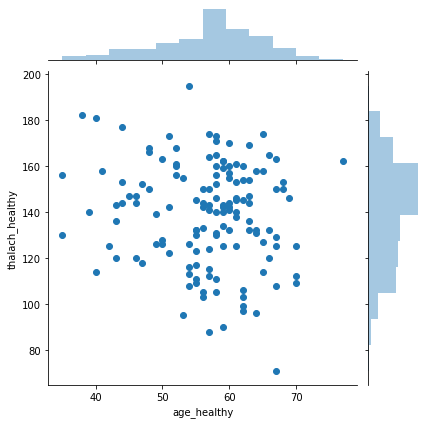

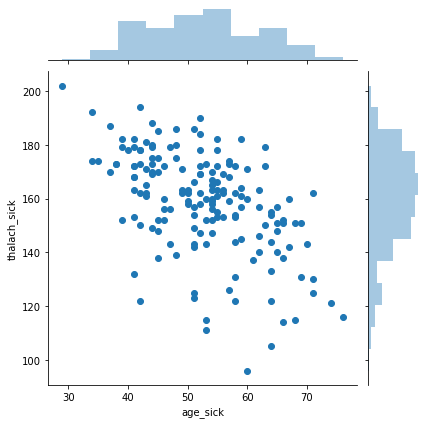

In [65]:
healthy_data['age_healthy'] = healthy_data['age']
healthy_data['thalach_healthy']= healthy_data['thalach']
sick_data['age_sick'] = sick_data['age']
sick_data['thalach_sick'] = sick_data['thalach']


sns.jointplot(healthy_data['age_healthy'] ,healthy_data['thalach_healthy'])
sns.jointplot(sick_data['age_sick'],sick_data['thalach_sick'])


it is very apperent from the join graph that age has a stronger correlation with the reduction of max heart rate with regarding sick people

#### Q2.E

For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

In [66]:
def healthy_rating(row):
    if row['target'] == 0:
        return 'healthy'
    else:
        return 'sick'


data['target_words'] = data.apply(healthy_rating, axis=1)
data[data['target_words'] == 'healthy'].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_words
165,67.0,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1,1.5,1,3,2,0,healthy
166,67.0,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1,2.6,1,2,3,0,healthy
167,62.0,0.0,0.0,140.0,240.0,0.0,0.0,160.0,0,3.6,0,2,2,0,healthy
168,63.0,1.0,0.0,130.0,254.0,0.0,0.0,147.0,0,1.4,1,1,3,0,healthy
169,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1,3.1,0,0,3,0,healthy


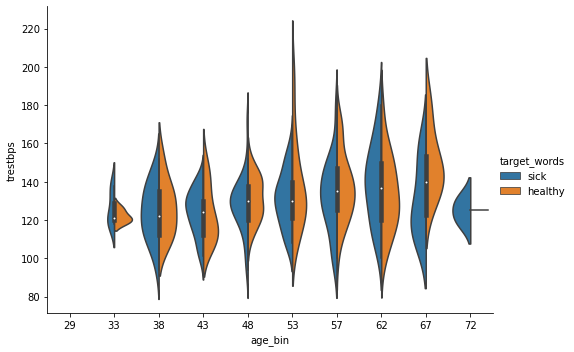

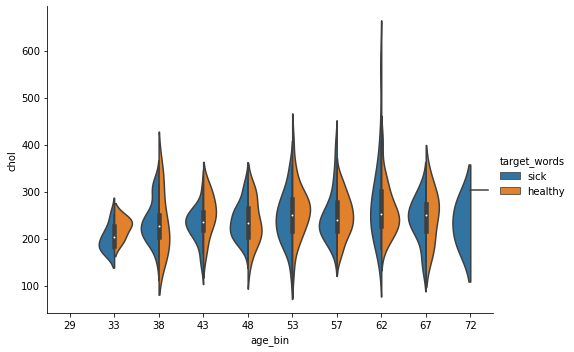

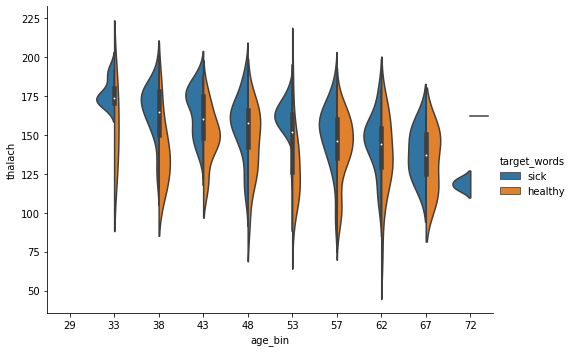

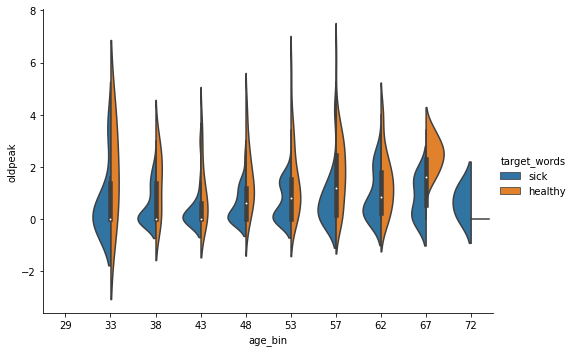

In [67]:
age_vals, age_bins = np.histogram(data['age'])
data['age_bin'] = pd.cut(data['age'], bins=age_bins, labels=list(map(int, age_bins[:-1])))
for col in numerical_columns:
    if col != 'age':
        sns.catplot(x="age_bin", y=col, hue="target_words", kind="violin", split=True, data=data,aspect=11.7/8.27);


### Question 3 - Heavy Tailed distributions (10 points)

Recall the definition of Heavy Tailed distribtion from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

#### 3.A
Does the standard normal distribution have a heavy right tail? prove your answer.

we know that $\lim\limits_{x \to \inf}\phi(x) = 1$

$\lim\limits_{x \to \infty}e^{tx}(1-\phi(x)) = \lim\limits_{x \to \infty}\frac{(1-\phi(x))}{e^{-tx}}$

$\lim\limits_{x \to \infty}\frac{\frac{d}{dx}(1-\phi(x))}{\frac{d}{dx}(e^{tx})} = \lim\limits_{x \to \infty}\frac{-\phi'(x)}{-te^{-tx}}$ using lhopital rule.

we know that $\phi'(x)$ is the standard normal pdf $f(x) = \frac{1}{\sqrt{(2\pi)}}e^{-\frac{1}{2}x^2}$

so the limit now looks like:

$\lim\limits_{x \to \infty}\frac{-\phi'(x)}{-te^{-tx}} = \lim\limits_{x \to \infty}\frac{\frac{1}{\sqrt{(2\pi)}}e^{-\frac{1}{2}x^2}}{te^{-tx}}=  \lim\limits_{x \to \infty}\frac{1}{t\sqrt{2\pi}}e^{tx-\frac{1}{2}x^2}=0$


meaning, standard normal does not have a heavy right tail.


#### 3.B
Does the standard log-normal distribution have a heavy right tail? prove your answer.

$\lim\limits_{x \to \infty}\frac{\frac{d}{dx}(1-\phi(x))}{\frac{d}{dx}(e^{tx})} = \lim\limits_{x \to \infty}\frac{-\phi'(x)}{-te^{-tx}}$ using lhopital rule.

we know that $\phi'(x)$ is the standard lognormal pdf $f(x) = \frac{1}{x\sqrt{(2\pi)}}e^{-\frac{1}{2}(ln(x))^2}$

so the limit now looks like:

$\lim\limits_{x \to \infty}\frac{-\phi'(x)}{-te^{-tx}} = \lim\limits_{x \to \infty}\frac{e^{-\frac{1}{2}(ln(x))^2}}{tx\sqrt{2\pi}e^{-tx}}= \frac{e^{tx-\frac{1}{2}ln(x)^2}}{tx\sqrt{2\pi}}$

using lhopital again $\lim\limits_{x \to \infty}\frac{\frac{d}{dx}(e^{tx-\frac{1}{2}ln(x)^2})}{\frac{d}{dx}(tx\sqrt{2\pi})}= \frac{(t-\frac{ln(x)}{x})e^{tx-\frac{1}{2}ln(x)^2}}{t\sqrt{2\pi}} = \frac{te^\infty}{t\sqrt{2\pi}} = \infty$

we used $\lim\limits_{x \to \infty}\frac{1}{2x}(lnx)^2 = 0$

we used $\lim\limits_{x \to \infty}t-\frac{lnx}{x} = t$

meaning, it standard log normal have a heavy right tail.


### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
After i rolls are determined the $i+1^{st}, X_{i+1},$ is drawn according to the row that corresponds to the value of $X_i$ in the matrix $T$ below. <br>
In other words, $T$ is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [68]:
import numpy as np
from matplotlib import pyplot as plt 
T = np.array([[0.4,0.2,0.1,0,0.1,0.2],[0.2,0.4,0.2,0.1,0,0.1],[0.1,0.2,0.4,0.2,0.1,0],[0,0.1,0.2,0.4,0.2,0.1],[0.1,0,0.1,0.2,0.4,0.2],[0.2,0.1,0,0.1,0.2,0.4]])
#print(T)

In [69]:
test = np.array([[1,2,3],[4,5,6]])
#print(test)
print(T[1,:])

[0.2 0.4 0.2 0.1 0.  0.1]


In [70]:
def getTrajectories(num_of_trajectories,length_of_each_traj):
    results = []
    for i in range(num_of_trajectories):
        traj = []
        first_choice = np.random.randint(1,7)
        traj.append(first_choice)
        t = np.zeros(6)
        t[first_choice-1] = 1
        res = t
        choice = first_choice
        for i in range(length_of_each_traj):
            #res = np.matmul(res,T)
            choice = np.random.choice(np.arange(1, 7), p=T[choice-1,:])
            traj.append(choice)
        results.append(traj)
    return np.array(results)

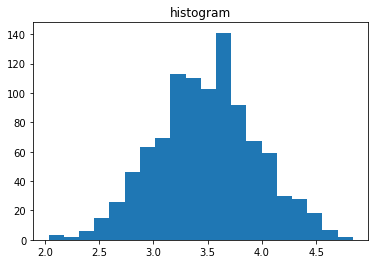

0.46482479775918006
3.4895806451612903


In [71]:
q4a = getTrajectories(1000,30)
q4a_average = q4a.mean(axis=1)
_,q4a_bins,_= plt.hist(q4a_average, bins = 20) 
plt.title("histogram") 
plt.show()
print(np.std(q4a_average))
print(np.mean(q4a_average))

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

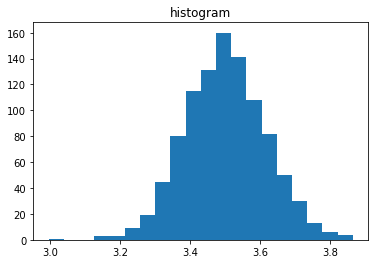

0.11550480802050572
3.499754491017964


In [72]:
q4b = getTrajectories(1000,500)
q4b_average = q4b.mean(axis=1)
_,q4b_bins,_=plt.hist(q4b_average, bins = 20) 
plt.title("histogram") 
plt.show()
print(np.std(q4b_average))
print(np.mean(q4b_average))

#### 4.C
Draw normal fit curves on your two histograms.

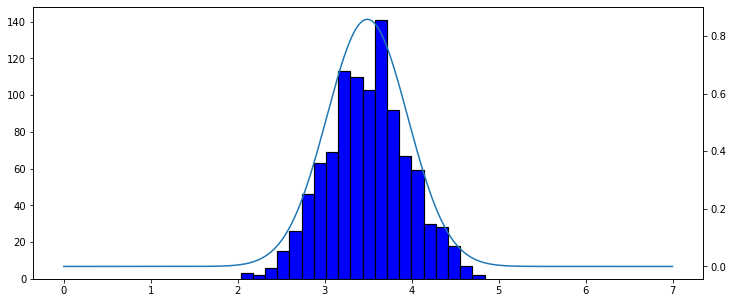

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# create plot
fig, ax1 = plt.subplots(figsize=(12, 5))
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(0, 7, 0.001)
#print(x_axis)
# Mean = 0, SD = 2.
ax1.hist(q4a_average, bins=20, color="blue", edgecolor='black', linewidth=1.2)
ax2 = ax1.twinx()
ax2.plot(x_axis, norm.pdf(x_axis,np.mean(q4a_average),np.std(q4a_average)))

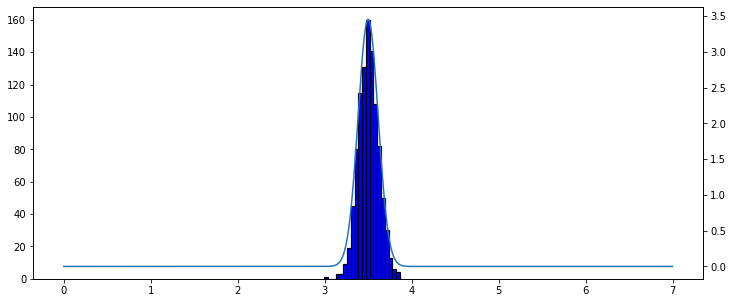

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# create plot
fig, ax1 = plt.subplots(figsize=(12, 5))
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(0, 7, 0.001)
#print(x_axis)
# Mean = 0, SD = 2.
ax1.hist(q4b_average, bins=20, color="blue", edgecolor='black', linewidth=1.2)
ax2 = ax1.twinx()
ax2.plot(x_axis, norm.pdf(x_axis,np.mean(q4b_average),np.std(q4b_average)))

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

In [75]:
from numpy.linalg import matrix_power
def calc_cov_X_0(T,mean):
    res = {}
    for k in range(1,501):
        e_xy = 0
        T_power = np.transpose(matrix_power(T,k))
        
        for i in range(0,6):
            for j in range(0,6):
                e_xy += (i+1)*(j+1)*T_power[j][i]
        e_xy/=T_power.sum()
        res['Cov(X_0,X_{0}'.format(k)] = e_xy  - mean**2
    return res
calc_cov_X_0(T,3.5)
                
    
    

{'Cov(X_0,X_1': 1.1166666666666671,
 'Cov(X_0,X_2': 0.5166666666666639,
 'Cov(X_0,X_3': 0.2526666666666664,
 'Cov(X_0,X_4': 0.12546666666666617,
 'Cov(X_0,X_5': 0.0625866666666699,
 'Cov(X_0,X_6': 0.031266666666668996,
 'Cov(X_0,X_7': 0.01562826666666517,
 'Cov(X_0,X_8': 0.007813146666668658,
 'Cov(X_0,X_9': 0.003906378666664878,
 'Cov(X_0,X_10': 0.0019531506666634613,
 'Cov(X_0,X_11': 0.0009765676266688672,
 'Cov(X_0,X_12': 0.0004882822746665738,
 'Cov(X_0,X_13': 0.0002441408298636816,
 'Cov(X_0,X_14': 0.00012207035346278872,
 'Cov(X_0,X_15': 6.103516444255774e-05,
 'Cov(X_0,X_16': 3.051757976635372e-05,
 'Cov(X_0,X_17': 1.525878938934966e-05,
 'Cov(X_0,X_18': 7.629394595198846e-06,
 'Cov(X_0,X_19': 3.8146972816122116e-06,
 'Cov(X_0,X_20': 1.9073486363652137e-06,
 'Cov(X_0,X_21': 9.536743217353205e-07,
 'Cov(X_0,X_22': 4.768371599794818e-07,
 'Cov(X_0,X_23': 2.3841858087791934e-07,
 'Cov(X_0,X_24': 1.1920928955078125e-07,
 'Cov(X_0,X_25': 5.960464477539063e-08,
 'Cov(X_0,X_26': 2.9802

#### 4.E - Bonus
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that 
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

### Question 5 - Sampling of Kendall correlation (15 points)

Recall that the Naive time complexity of computing Kendall correlation is $O(n^2)$. We will investigate a sampling approach to approximate Kendall correlations efficiently. 

#### 5.A
Draw a sample of 10M samples from a bivariate distribution $(X,Y)\sim \mathcal{N}(\bf{0},S)$ with the covariance matrix $S=\begin{pmatrix} 2 & 3\\ 3 & 5 \end{pmatrix}$. <br>
Calculate the Kendall correlation $\tau(X,Y)$.
How long did this calculation take?

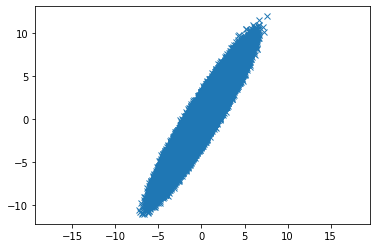

kendal calc maeasure time: 8.263055086135864
kendal result:  0.7951797452175347


In [76]:
first_gaussian = stats.norm.rvs(loc=0, scale=1, size=10)
first_gaussian
mean = [0, 0]
cov = [[2, 3], [3, 5]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 10000000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()
start = time.time()
real_corr = stats.kendalltau(x, y)[0]
end = time.time()

print('kendal calc maeasure time:', end - start)
print('kendal result: ', real_corr)


#### 5.B
Sample 1,000 points from the data and calculate the Kendall correlation $\tau(U,V)$. 

In [77]:
params = np.random.multivariate_normal(mean, cov, 10000000)


In [78]:
def sample_n_corr(n):
    samples_n = params[np.random.choice(params.shape[0], n, replace=False)]
    x, y= samples_n.T
    corr = stats.kendalltau(x, y)[0]
    return corr
sample_n_corr(1000)

0.8041721721721722

#### 5.C
Repeat Section 5.B 1000 times and plot a histogram of the calculated $\tau(U,V)$ values. Indicate the true $\tau(X,Y)$ (calculated on the entire 10M samples) on the histogram. What are the empirical mean and stadard deviation of the calculated $\tau(U,V)$ values?

In [79]:
def many_samples(n,rounds=1000, verbose=True):
    kebdall_results = []
    for i in range(rounds):
        if i % 100 == 0 and verbose:
            print('n: ', n,'round: ', i)
        kebdall_results.append(sample_n_corr(n))
    return kebdall_results


In [80]:
kebdall_results= many_samples(1000, 1000)
mean = np.mean(kebdall_results)
std = np.std(kebdall_results)
plt.hist(kebdall_results)
plt.axvline(real_corr, color='k', linestyle='dashed', linewidth=1)
print('mean: ', mean)
print('std: ', std)

n:  1000 round:  0


KeyboardInterrupt: 

#### 5.D
Repeat Section 5.C for samples of $m={10, 50, 100, 500, 1000, 5000}$ points. <br>
What is the naive time complexity of each calculation? <br>
Compare the empirical time complexity and the standard deviation of the calucated values to the size of the sample.

In [ ]:
def D_5(): 
    sample_size = [10,50,100,500,1000,5000]
    experiment_results = []
    rounds = 1000
    for size in sample_size:
        print('Calc for size: ', size)
        start = time.time()
        kendall_results = many_samples(size, rounds = rounds, verbose = True)
        time_complexity = time.time() - start
        experiment_results.append({'kendall_results': kendall_results, 
                                   'size': size,
                                   'time_complexity': time_complexity,
                                   'std': np.std(kendall_results)})
    return experiment_results


In [ ]:
experiment_results = D_5()

The naive time complexity of kendall is $O(n^2)$ since we are counting concordant pairs, and we need to go throught each possible pair i


In [ ]:
np.var(experiment_results[0]['kendall_results']) - np.var(experiment_results[4]['kendall_results'])


In [ ]:
# list(map(lambda x : [x['size'], x['time_complexity']],experiment_results))
X = []
Y = []
Z = []
for res in experiment_results:
    X.append(res['size'])
    Y.append(np.std(res['kendall_results']))
    Z.append(res['time_complexity'])
    print('size: ', res['size'],           'time: ', res['time_complexity'], 
          'std: ',  np.std(res['kendall_results']))

plt.plot(X,Y)
plt.xlabel('size')
plt.ylabel('std')


In [ ]:
plt.plot(X,Z)
plt.xlabel('size')
plt.ylabel('time')


Accorindg to the graph we can see that the time is growing pretty slowly even though the naive kenall correlation implemenation is $O(n^2)$. This suggests that the library that we used is implementing the Kendall with some sort over the variance in order to count the concardant pairs. 

#### 5.E
A coleague found an old dataset which she believes originated from the same popuation as the data in Section 5.A. The dataset is avaialble as "Kendall_data.csv". 

Using Kendall correlation and your answer to Section 5.D, how much confidence do you have in rejecting your coleague's claim? Explain your answer and show your calculation.

In [16]:
import scipy.stats
from scipy.stats import norm
# import matplotlib.pyplot as plt

x = 51
0.4 * norm.cdf(x, loc = 30, scale= 5) + 0.3 * norm.cdf(x, loc = 35, scale= 7) + 0.3 * norm.cdf(x, loc = 40, scale= 10)
# print(norm.cdf(60, 225,55) * 18000)



0.955954196572594

In [20]:
import math
N = 40
B = 15
T = 160
meu = (B*(N+1)) /2
sigma = math.sqrt((B*(N-B)*(N+1))/12)
Z_T = ((T-meu)/sigma)
print(Z_T)

print(norm.cdf(Z_T))

-4.120738745040511
1.8882974290145123e-05


In [21]:
import math
N = 90
B = 15
T = 200
meu = (B*(N+1)) /2
sigma = math.sqrt((B*(N-B)*(N+1))/12)
Z_T = ((T-meu)/sigma)
print(Z_T)
print(norm.cdf(Z_T))

-5.223853432921399
8.761875204686125e-08


In [26]:
import math


-1 * ((1/4) * math.log(1/4,2) + 6/16 * math.log(6/16,2) + 1/4* math.log(1/4,2) + 1/16 * math.log(1/16, 2))





1.7806390622295662